In [1]:
# Initial setup
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Adjust size of figures so they are easier to see
from matplotlib import rcParams
rcParams.update({'font.size': 14, 'figure.figsize': (10, 5)})


# Measuring expansion history with SN 1a

In lecture and problem sets, we have been exploring how the current proper distance varies with redshift. However, current proper distance to a galaxy is not something that we can actually measure. Instead, astronomers use *luminosity distance* which uses the fact that the observed flux from an object decreases with distance as $1 / d^2$. For an object with known luminosity $L$ and measured flux $f$, the luminosity distance is defined as

\begin{equation}
d_L = \left( \frac{L}{4 \pi f} \right)^{1/2}
\end{equation}

In an expanding universe, the measured flux will be affected by the redshift of light (redshifted photons carry less energy) and stretching of space (emitted photons are further apart, so they arrive at a slower rate). Measured flux is also affected by the curvature of space, but we are going to assume flat geometry for all of our analysis here. In a flat universe, the relationship between luminosity distance and current proper distance is simply (Ryden eq 6.29)

\begin{equation}
d_L = d_p(t_0) (1 + z)
\end{equation}

Substituting the expression for current proper distance in a flat single-component universe (Ryden eq 5.50), we find a relationship between luminosity distance and the equation of state, $w$.

\begin{equation}
d_L = \frac{c}{H_0} \frac{2}{1 + 3 w} \left[ 1 - (1 + z)^{-(1+3w)/2} \right]
\end{equation}

Of course it is incorrect to assume that the universe contains only a single component, but this expression allows us to determine an effective equation of state, which should be roughly constant over a limited range of redshift. 


## Type 1a supernova

To use constrain cosmology with luminosity distance, we need to find some objects that satisfy two important properties:

1. Known intrinsic luminosity (i.e. standard candles)
2. Really bright, so we can see them even at high redshift

The best objects for this job are type 1a supernova. This type of supernova occurs when a white dwarf is in a binary system with another star. The high gravity of the white dwarf leads to accretion of gas from the companion star. This accretion continues until the white dwarf reaches the Chandrasekhar mass, $1.4 M_\odot$, becomes unstable, and undergoes thermonuclear detonation. An important feature of these events is that they should always occur for the same white dwarf mass, so the intrinsic luminosities can be calibrated. In practice, it turns out that the luminosities for type 1a supernova do vary, but there is a tight relationship between intrinsic luminosity and the duration of the event.

We will use data from the [Union 2.1](http://supernova.lbl.gov/union/) compilation, which contains the redshift and luminosity distance for 580 type 1a supernova. This compilation was published in 2011, with science results described in [Suzuki et al](https://arxiv.org/pdf/1105.3470.pdf).


## Data inspection

The first thing to do is to load the dataset and make some plots to inspect it. The data are contained in a tabular text file, [SCPUnion2.1_mu_vs_z.txt](SCPUnion2.1_mu_vs_z.txt). The columns of that file are:

1. Name / identifier for the type 1a supernova
2. Redshift
3. Distance modulus
4. Distance modulus uncertainty
5. Probability that the supernova is hosted in a low-mass galaxy (we aren't going to use this)

Use the code below to load the data into a set of arrays. Then make a plot of distance modulus vs redshift. Use [plt.errorbar](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html) to include errorbars.


<ErrorbarContainer object of 3 artists>

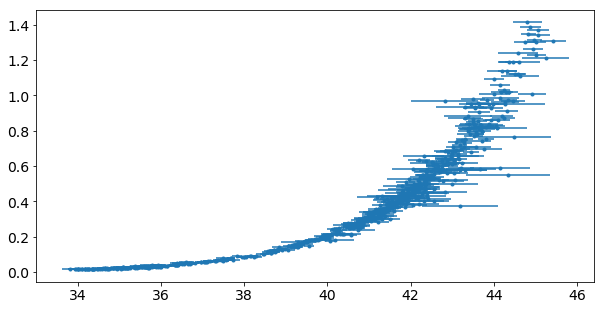

In [3]:
# Using pandas DataFrame to read tabular data.
import pandas as pd
union21 = pd.read_csv("SCPUnion2.1_mu_vs_z.txt", comment="#", sep="\t", names=("name", "z", "d", "derr", "Plmg"))
z = np.array(union21.z)       # Redshift
d = np.array(union21.d)       # Distance modulus
derr = np.array(union21.derr) # Distance modulus uncertainty








# Plot distance modulus vs redshift with errorbars

plt.errorbar(d,z,xerr=derr,fmt='.')


## Distance modulus

The luminosity distance is provided in the form of distance modulus. This uses astronomical magnitudes, which are a logarithmic system for describing the brightness of objects. The distance modulus is related to luminosity distance as

\begin{equation}
m = 5 \log_{10} \left( \frac{d_L}{D} \right)
\end{equation}

Ordinarily, the reference distance $D$ is equal to 10 pc but for this dataset they use a different reference. 

Try converting distance modulus to luminosity distance measured in units of this unknown reference distance. Plot this luminosity distance vs redshift for only the low-redshift supernova ($z < 0.1$). This should give you a linear Hubble diagram. Compare the slope of this Hubble diagram to $H_0 = 68 \, \mathrm{km} \, \mathrm{s}^{-1} \, \mathrm{Mpc}^{-1}$ and estimate the reference distance $D$.


65.84155080068456


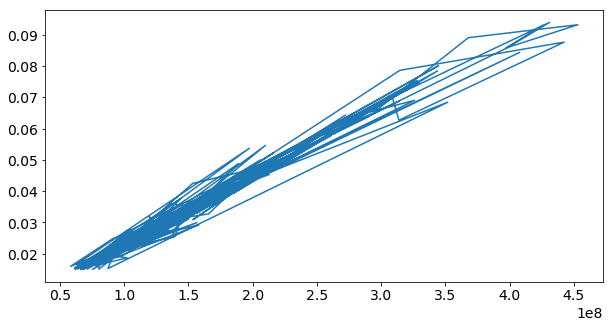

In [15]:
z2 = np.array([])
d2 = np.array([])
derr2 = np.array([])

# creating arrays with z<.1. 
for i in range(1,len(z)):
    if z[i]<.1:
        z2=np.append(z2,z[i])
        d2=np.append(d2,d[i])
        derr2=np.append(derr2,derr[i])

        
        
        
# Convert distance modulus to luminosity distance, in units of reference distance
D = 10
#print(len(d))
dL = D*(10**(d2/5)) #from m = d2 = 5log(dL/D)
# Plot luminosity distance vs redshift
plt.plot(dL,z2)
# Use np.polyfit to find the slope of the line and estimate the reference distance
fit = np.polyfit(z2, dL, 1) # fit a first-order polynomial to dL(z)
slope = fit[0]             # slope is the first element of the array returned by np.polyfit
#from scipy.stats import linregress
#linregress(dL, z)

dLobserved = D*(10**(d/5))# distance values for all distance modulus


#Calculating H
c = 299792 #speed of light km/s
H0 = c/slope/(1e-6)
print(H0)

#solving for q_0 using book formula
#q0=1-(dL2*H0/(c*z)-1)*(2/z)
#print(q0);


<ErrorbarContainer object of 3 artists>

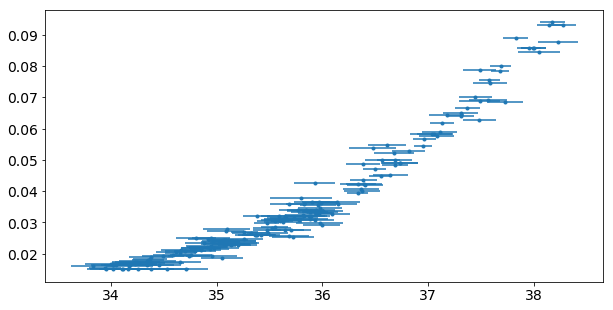

In [11]:
plt.errorbar(d2,z2,xerr=derr2,fmt='.')

## Determine equation of state

Now we want to use the full supernova sample, which extends out to $z \sim 1.4$, to constrain the equation of state, $w$.

First, write a function that calculates distance modulus for an array of redshift values. This function requires two parameters -- equation of state and a normalization parameter that combines $H_0$ and the reference distance. (In terms of distance modulus, this normalization parameter is just the $z = 0$ y-intercept.)

In [59]:
def distance_modulus(z,param):
    """
    Calculate distance modulus for an array of redshifts using the specified parameters.
    
    Inputs
    ------
    z : array
        Array of redshift values
    p : two-element array
        Model parameters.
        param[0] is equation of state w
        param[1] is the normalization parameter
        
    Returns
    -------
    dm : array
        Distance modulus values calculated for each input redshift.
    
    """
    
    # Write your function here
    
    H0=65.84155080068456
    D=10
    q0=param[0]

    dLmodel = c/H0*z*(1-(((1+q0)/2)*z))
    dm = 5*np.log10(dLmodel/D)
    return dm;
    

In [60]:
q0=np.random.randint(-1,1,len(z))
dmdistance_modulus(z=z,param=q0)


#from scipy.stats import chisquare
#chisquare(q0)

array([ 5.53375689,  6.73329182,  6.85170761,  7.44229612,  7.2076994 ,
        7.90660397,  7.68104211,  4.45386321,  6.37351464,  6.5221074 ,
        6.06190076,  4.73138521,  8.1989506 ,  5.44586035,  7.57288883,
        5.37797554,  6.72816976,  5.68700619,  4.34078975,  4.21749123,
        5.68176081,  5.21285273,  5.16223588,  5.34118201,  6.68646894,
        5.19432164,  4.17942617,  6.01702419,  6.68083878,  4.97774237,
        8.62625298,  6.03366988,  4.33754076,  4.39083888,  5.45819849,
        4.95939373,  4.35449523,  5.09444341,  6.06055668,  4.69431528,
        4.50058108,  5.75057828,  5.12455778,  4.39251133,  6.88276348,
        4.42416809,  5.4864284 ,  4.44710493,  5.64117731,  4.36871692,
        4.15570881,  6.90971225,  9.0821513 ,  6.22046846,  8.62135729,
        8.92254272,  8.71381987,  7.67634523,  7.05570339,  5.70758122,
        6.28969565,  4.18425166,  5.01838232,  4.29475821,  6.04547909,
        4.46296551,  5.72823094,  4.98943298,  4.29475821,  5.24

Next, write a function to calculate a $\chi^2$ statistic for the Union 2.1 dataset for a specified model. The $\chi^2$ statistic is a measure of whether the model is a good fit to the data. Smaller values of $\chi^2$ indicate a better match between data and model. 

It is defined as

\begin{equation}
\chi^2 = \sum \frac{(d - m)^2}{\sigma^2}
\end{equation}

where $d$ are the data (Union 2.1 distance modulus values), $m$ is the model (distance modulus values calculated for a specific choice of parameters using the function that you just wrote), and $\sigma$ are the distance modulus error bars. The summation runs over the 580 supernova in the dataset.

Write a function that calculates $\chi^2$. The inputs to this function are the measured distance moduli, their error bars, and the two model parameters. Your $\chi^2$ function should use the distance modulus function that you wrote above.


In [46]:
def calc_chi2(d, derr, dm):
    """
    Calculate chi^2 for SN 1a dataset.
    
    Inputs
    ------
    d : array
        Array of measured distance moduli
    derr : array
        Error bars for distance moduli
    param : two-element array
        Model parameters.
        param[0] is equation of state w
        param[1] is the normalization parameter
        
    Returns
    -------
    chi2 : float
        Total chi^2 value calculated for the specified data and model.
    
    """
   

    # Write your function here
    chi2 = sum(((d-dm)**2)/(derr**2))
    return chi2;

Now we can use the computer to search for the value of model parameters that gives the smallest $\chi^2$. We will use the `minimize` function from the `scipy` module. It will try calculating your $\chi^2$ function for many choices of the two parameters, but first we need to create a lambda function (anonymous function). This is a wrapper around the `calc_chi2` function that will provide the Union 2.1 distance moduli and errors, so that the lambda function that we feed into `minimize` only needs the `param` argument.

You also need to provide an initial guess for the model parameters. Pick $w = 0$ (matter-only) and make a guess for your normalization parameter by looking at the first plot you made of distance modulus vs redshift.

In [47]:
# Create lambda function
fitfunc = lambda p: calc_chi2(d=d, derr=derr, dm=dm)

# Initial guess
q_guess = 0.0
norm_guess = 8   # Pick something here
p0 = [q_guess, norm_guess]

# Now, run the minimization
from scipy.optimize import minimize
fit = minimize(fitfunc, p0, method="Nelder-Mead")
print(fit)


TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

What value of $w$ do you find? Does it look like a radiation-dominated universe, matter-dominated, $\Lambda$-dominated, or something in between?


## Including systematic errors

The error bars that you used don't fully describe the uncertainty in the measurement of distance modulus. A more complete description is provided by a covariance matrix, which quantifies correlations between all of the measurements that could arise from both random and systematic errors. Union 2.1 provides this [covariance matrix](SCPUnion2.1_covmat_sys.txt), which you can read in using the following code. The size of the matrix is $580 \times 580$.

In [ ]:
covmat = np.genfromtxt("SCPUnion2.1_covmat_sys.txt")
print(covmat.shape)


To use the covariance matrix, rewrite your $\chi^2$ function as the following matrix equation.

\begin{equation}
\chi^2 = (d - m)^T \Sigma^{-1} (d - m)
\end{equation}

where $\Sigma$ is the covariance matrix.

Use `np.linalg.inv` to calculate the inverse of a matrix, `np.transpose` to calculate the transpose of a vector, and `np.dot` to multiply vectors and matrices.


In [ ]:
# Write your new chi^2 function here


Once you have the new $\chi^2$ function that incorporates the full covariance matrix, create a new lambda function, rerun the minimization, and check to see if it affects your estimate of $w$.


In [ ]:
# Find the best-fit value of w including the effect of systematic errors.
